In [1]:
import sys
import itertools

sys.path.append('..') # Adds higher directory to python modules path.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from preprocessing.preprocessing_en import preprocess
from embd.fasttext import MeanEmbeddingVectorizer

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [2]:
# data
df = preprocess('../../resources/uci-news-aggregator.csv')

Loading data
Data loaded
Actual preprocessing start
Actual preprocessing end


In [3]:
df = df[['title', 'class']]
X = df['title']
Y = df['class']

encoder = LabelEncoder()
y = encoder.fit_transform(Y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_all = vectorizer.transform(X)
print(vectorizer.get_feature_names()[:10])

['000', '00007458', '001', '0019', '002', '003', '0030', '003shr', '004', '005']


In [4]:
# vectorization
# vectorizer = MeanEmbeddingVectorizer()
# X_train = vectorizer.transform(X_train)
# X_test = vectorizer.transform(X_test)
# X_all = vectorizer.transform(X)

# Train & test scores
# 0.8571885125837809
# 0.8550968230670897
# 0.8567701736901039

AttributeError: 'MeanEmbeddingVectorizer' object has no attribute 'get_feature_names'

In [5]:
# classification
log_reg = LogisticRegression(solver='newton-cg', multi_class='auto')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
print('Train & test scores')
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))
print(log_reg.score(X_all, y))

Train & test scores
0.8571885125837809
0.8550968230670897
0.8567701736901039


[1 0 1 1 2 1 3 1 0 3]
[[7.42410676e-02 8.47240129e-01 5.17240189e-02 2.67947847e-02]
 [5.13079484e-01 1.28192215e-01 1.47792083e-01 2.10936217e-01]
 [3.23869400e-04 9.98184625e-01 1.01071204e-03 4.80793502e-04]
 [4.85238596e-03 9.91042543e-01 1.60232582e-03 2.50274541e-03]
 [1.00752993e-01 1.60452406e-01 6.78161222e-01 6.06333801e-02]
 [5.98696923e-02 5.98171073e-01 1.13868182e-03 3.40820553e-01]
 [2.96485922e-02 1.74794950e-02 2.32313376e-02 9.29640575e-01]
 [1.59783986e-02 9.77460340e-01 2.03688976e-03 4.52437214e-03]
 [9.76935406e-01 1.53178314e-02 3.49864847e-03 4.24811390e-03]
 [1.31821151e-02 1.56034298e-03 4.72703108e-04 9.84784839e-01]]


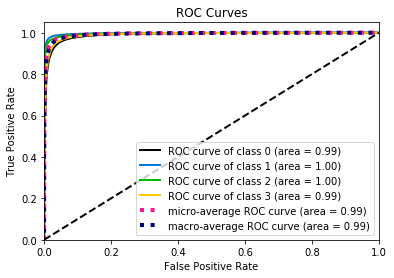

In [18]:
import scikitplot as skplt

y_proba_test = log_reg.predict_proba(X_test)
print(y_test[:10])
print(y_proba_test[:10])

skplt.metrics.plot_roc(y_test, y_proba_test)
plt.show()

[[21779   399   164  1072]
 [  352 29687    99   215]
 [  374   240  8258   152]
 [ 1141   399    78 20075]]
Normalized confusion matrix


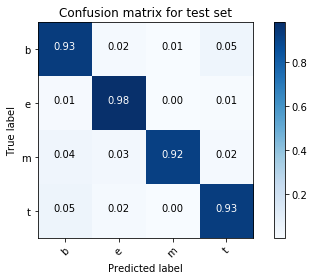

In [19]:
y_pred_test = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix for test set',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

plot_confusion_matrix(cm, encoder.classes_)

In [20]:
print(classification_report(y_test, y_pred_test, target_names=encoder.classes_))

              precision    recall  f1-score   support

           b       0.92      0.93      0.93     23414
           e       0.97      0.98      0.97     30353
           m       0.96      0.92      0.94      9024
           t       0.93      0.93      0.93     21693

   micro avg       0.94      0.94      0.94     84484
   macro avg       0.95      0.94      0.94     84484
weighted avg       0.94      0.94      0.94     84484



In [10]:
# cross validation section
from sklearn.model_selection import cross_val_score

lg = LogisticRegression(n_jobs=-1, solver='newton-cg', multi_class='auto')
scores = cross_val_score(lg, X_all, y, cv=5)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.86405871 0.85061253 0.86769092 0.86458974 0.8543933 ]
Accuracy: 0.860 (+/- 0.01)


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
lg = LogisticRegression(n_jobs=-1, solver='newton-cg', multi_class='auto')
scores = cross_val_score(lg, X_all, y, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.94454571 0.945611   0.94441551 0.9447351  0.94501918]
Accuracy: 0.945 (+/- 0.00)


In [13]:
from sklearn.model_selection import cross_val_score

lg = LogisticRegression(n_jobs=-1, solver='newton-cg', multi_class='auto')
scores = cross_val_score(lg, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.94232789 0.94395372 0.94416086 0.94094931 0.94235493]
Accuracy: 0.943 (+/- 0.00)


In [30]:
from sklearn.model_selection import GridSearchCV

lg = LogisticRegression(n_jobs=-1, solver='newton-cg', multi_class='auto')

param_grid = [  
  {'C' : [0.01, 0.1, 1, 10, 100],    
   'solver' : ['newton-cg', 'lbfgs'],
   'penalty':['l2']},
  {'C':[0.01, 0.1, 1, 10, 100],    
   'solver':['liblinear'],
   'penalty':['l1', 'l2']}
 ]

clf = GridSearchCV(lg, param_grid, cv=5, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)
print(sorted(clf.cv_results_.keys()))
print()
print(clf.cv_results_)
print()
print(clf.best_estimator_)
print()
print(clf.best_score_)
print()
print(clf.best_params_)

c:\users\mikol\miniconda3\envs\newsletter\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_C', 'param_penalty', 'param_solver', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'split3_test_score', 'split3_train_score', 'split4_test_score', 'split4_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']

{'mean_fit_time': array([ 29.32238216,  22.14957371,  33.77678132,  42.62236581,
        67.10066185,  41.74417105, 121.10378098,  44.70043383,
       323.14653378,  46.98414769,   9.36490092,  11.12589693,
        16.80797067,  16.89559126,  27.37854548,  32.54610605,
        96.98256831,  68.52197886, 152.44381552, 128.30439572]), 'std_fit_time': array([ 1.91059481,  4.650783  ,  2.14481714,  3.12750973,  5.76614501,
        2.62783991, 15.4811067 ,  3.64033952, 66.65583857,  3.39741954,
        0.5303071 ,  0.81483773,  2.44314724,  1.64379259,  2.5669852

In [35]:
# final model
log_reg = LogisticRegression(C=10, solver='liblinear', penalty='l2', multi_class='auto')
log_reg.fit(X_all, y)
print(log_reg.score(X_all, y))

0.9715590444558602
